In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('/home/usamakhan/Documents/PAI/Social_Network_Ads.csv')
data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


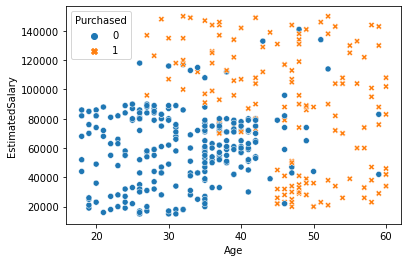

In [4]:
sb.scatterplot(x='Age',y='EstimatedSalary',data=data,hue='Purchased',style='Purchased')
plt.show()

In [5]:
feature=data.iloc[:,:-1].values
label=data.iloc[:,-1:]


In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(feature,label,test_size=0.2,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape


((320, 2), (80, 2), (320, 1), (80, 1))

In [7]:
scaler=StandardScaler()
x_scaled_test=scaler.fit_transform(x_test)
x_scaled_train=scaler.fit_transform(x_train)
x_scaled_train,x_scaled_test

(array([[ 1.92295008e+00,  2.14601566e+00],
        [ 2.02016082e+00,  3.78719297e-01],
        [-1.38221530e+00, -4.32498705e-01],
        [-1.18779381e+00, -1.01194013e+00],
        [ 1.92295008e+00, -9.25023920e-01],
        [ 3.67578135e-01,  2.91803083e-01],
        [ 1.73156642e-01,  1.46942725e-01],
        [ 2.02016082e+00,  1.74040666e+00],
        [ 7.56421121e-01, -8.38107706e-01],
        [ 2.70367388e-01, -2.87638347e-01],
        [ 3.67578135e-01, -1.71750061e-01],
        [-1.18475597e-01,  2.20395980e+00],
        [-1.47942605e+00, -6.35303205e-01],
        [-1.28500455e+00, -1.06988428e+00],
        [-1.38221530e+00,  4.07691369e-01],
        [-1.09058306e+00,  7.55356227e-01],
        [-1.47942605e+00, -2.00722133e-01],
        [ 9.50842613e-01, -1.06988428e+00],
        [ 9.50842613e-01,  5.81523798e-01],
        [ 3.67578135e-01,  9.87132798e-01],
        [ 5.61999628e-01, -8.96051849e-01],
        [-6.04529329e-01,  1.45068594e+00],
        [-2.12648508e-02, -5.773

In [8]:

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_scaled = LogisticRegression()
lr_scaled.fit(x_scaled_train,y_train)

/home/usamakhan/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/usamakhan/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [9]:
y_pred = lr.predict(x_test)
y_pred_scaled = lr_scaled.predict(x_scaled_test)
y_pred_scaled

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1])

In [10]:
from sklearn.metrics import accuracy_score
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.725
Scaled 0.8875


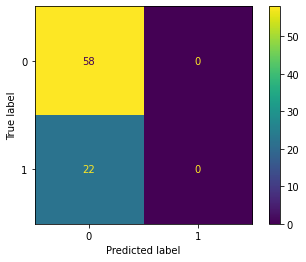

In [11]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()